In [1]:
import sys
print(sys.executable)

/Users/audreyliang/cs315/CS315Project2/cs315project2datacollection/.project2/bin/python


In [2]:
pip install tensorflow tensorflow_hub scikit-learn seaborn plotly nbformat


[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [3]:
import tensorflow as tf
import tensorflow_hub as hub
import numpy as np
import pandas as pd

In [4]:

import shutil
import os

# Load the Universal Sentence Encoder from TensorFlow Hub
embed = hub.load("archive")


<a id="sec3"></a>
## 3. K-means clustering with word embeddings

In lecture we showed the clustering for the TikTok hashtags collected from posts, but for connecting this section to the t-SNE visualization section below, we will show here the clustering for our own list of news hashtags.

In [5]:
data_1 = pd.read_csv('overall_cosine_similarities.csv')
print(len(data_1))
data_2 = pd.read_csv('Sec2Gr3_74721_Scores.csv')
print(len(data_2))
data_3 = pd.read_csv('Sec2Gr3_77777_Scores.csv')
print(len(data_3))
all_data = pd.concat([data_1, data_2, data_3], ignore_index=True)
all_data = all_data.drop(['Unnamed: 0.1', 'Unnamed: 0'], axis=1)
all_data.to_csv('all_scores.csv', index = False)

#descriptions = tiktok['suggested_words'].dropna().tolist()
#descriptions
#print(len(descriptions))

print(len(all_data))





5547
6474
330
12351


In [6]:
def generate_video_list():
    # Read the CSV file containing cosine similarities
    df = pd.read_csv("all_scores.csv")
    df = df[df['cos_score'].notnull()]
    # Pandas DF Cols: video id, description, similarities
    df = df.sort_values(by=['cos_score'], ascending=False)
    return df
data = generate_video_list()
df = all_data[all_data['cos_score'] > 0.55]
df = df.dropna(subset=['video_description'])
print(df)
len(df)

                  video_id  video_date  \
9      7293175043465497889  2023-10-23   
25     7311666439058902302  2023-12-12   
119    7312359756113464583  2023-12-14   
178    7314025496369483051  2023-12-18   
196    7314046288532688160  2023-12-18   
...                    ...         ...   
12210  7308378375125585198  2023-12-03   
12263  7302220369732259118  2023-11-16   
12316  7308223637524319530  2023-12-02   
12344  7304755085349784875  2023-11-23   
12345  7304042883231796522  2023-11-21   

                                       video_description  \
9      things ex staff said about kpop idols pt k pop...   
25     part hand over all your movie film series show...   
119                               have an urmo christmas   
178                                         nwrd chicken   
196    the thailand tsunami resulted from a magnitude...   
...                                                  ...   
12210     spanish king the boyz tbz kpop k pop fy p eric   
12263  these ol

732

In [7]:

Embed = embed(df['video_description'])


In [8]:
import matplotlib.pyplot as plt
def elbowMethod(embeddings, maxK):
    """
    Implements the Elbow method for finding most optimal k.
    It keeps track of a measure named "inertia" for each cluster.
    """
    sumSquaredDistances = []
    kValues = list(range(1, maxK))
    for k in kValues:
        km = KMeans(n_clusters=k, random_state=42)
        km = km.fit(embeddings)
        sumSquaredDistances.append(km.inertia_)
    
    # plot the line to identify the elbow
    plt.plot(kValues, sumSquaredDistances, 'ro-')
    plt.xlabel('k')
    plt.xticks(kValues)
    plt.ylabel('Sum of squared distances')
    plt.title('Elbow Method For Optimal k')
    plt.show()

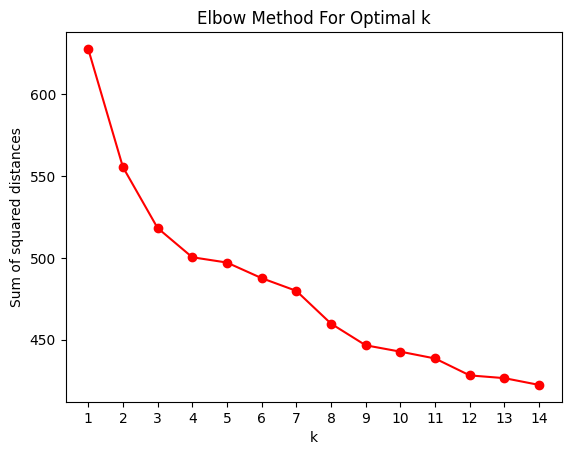

In [67]:
elbowMethod(Embed, 15)

In [68]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

# Assuming 'X' is your data matrix
# Decide the range of k values you want to evaluate
range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

# Initialize an empty list to store the silhouette scores
silhouette_avg_scores = []

# Calculate silhouette scores for different cluster counts
for n_clusters in range_n_clusters:
    # Initialize the KMeans object with n_clusters value and a random state for reproducibility
    clusterer = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = clusterer.fit_predict(Embed)
    
    # The silhouette_score gives the average value for all the samples
    silhouette_avg = silhouette_score(Embed, cluster_labels)
    silhouette_avg_scores.append(silhouette_avg)
    print(f"For n_clusters = {n_clusters}, the silhouette score is {silhouette_avg}")

# Find the number of clusters that has the maximum silhouette score
optimal_n_clusters = range_n_clusters[silhouette_avg_scores.index(max(silhouette_avg_scores))]
print(f"The optimal number of clusters based on silhouette score is: {optimal_n_clusters}")


For n_clusters = 2, the silhouette score is 0.09508725255727768
For n_clusters = 3, the silhouette score is 0.12282650172710419
For n_clusters = 4, the silhouette score is 0.1334332674741745
For n_clusters = 5, the silhouette score is 0.1076638400554657
For n_clusters = 6, the silhouette score is 0.10829073190689087
For n_clusters = 7, the silhouette score is 0.1085471585392952
For n_clusters = 8, the silhouette score is 0.09768131375312805
For n_clusters = 9, the silhouette score is 0.10691464692354202
For n_clusters = 10, the silhouette score is 0.10878027975559235
For n_clusters = 11, the silhouette score is 0.09446075558662415
For n_clusters = 12, the silhouette score is 0.09754897654056549
The optimal number of clusters based on silhouette score is: 4


**Step 2: Perform clustering with a fixed k value**

For this time, we will perform clustering with k=15. The code will take a few seconds (or more) to run:

In [9]:
from sklearn.cluster import KMeans

# Assuming Embed is your embedding matrix and df is your DataFrame
k = 9  # number of clusters
kmeans = KMeans(n_clusters=k, random_state=42)
clusters = kmeans.fit_predict(Embed)

# Before splitting and assigning, ensure df is a standalone DataFrame



**Step 1: Run the TSNE algorithm**

In [17]:

import pandas as pd
from sklearn.manifold import TSNE

# Run t-SNE for dimensionality reduction on the combined embeddings
tsne = TSNE(n_components=2, random_state=42)
tsne_results = tsne.fit_transform(Embed)

# Initialize the t-SNE DataFrame
tsne_df = pd.DataFrame(tsne_results, columns=['tsne_1', 'tsne_2'])
df = df.reset_index(drop=True)
df2 = pd.DataFrame(tsne_results, columns=['tsne_1', 'tsne_2'])
df2['description'] = df['video_description']
df2['cluster'] = clusters # the cluster indices where each news hashtags belong
df2
print(len(df2[df2['cluster']==0]))
print(len(df2[df2['cluster']==1]))
print(len(df2[df2['cluster']==2]))
print(len(df2[df2['cluster']==3]))
print(len(df2[df2['cluster']==4]))
print(len(df2[df2['cluster']==5]))
print(len(df2[df2['cluster']==6]))
print(len(df2[df2['cluster']==7]))
print(len(df2[df2['cluster']==8]))

115
149
81
109
67
108
33
33
37


In [21]:
# import plotly.express as px

# Create the scatter plot
fig = px.scatter(df2, x='tsne_1', y='tsne_2', hover_data='description', color="cluster")

# Format what to show next to the markers
fig.update_traces(textposition='top center', 
                  mode='markers+text', 
                  textfont=dict(size=6))

fig.update_layout(title='Embeddings of TikTok Video Descriptions')
fig.show()






In [93]:
df = df.reset_index(drop=True)
df2['cosine']=df['cos_score']

In [94]:
df2

,tsne_1,tsne_2,description,cluster,cosine
0,3.782550,-10.835074,things ex staff said about kpop idols pt k pop...,0,0.553455
1,-14.726149,-17.889147,part hand over all your movie film series show...,0,0.604250
2,-24.326784,-1.949025,have an urmo christmas,5,0.600661
3,-20.365002,-0.211998,nwrd chicken,3,0.565047
4,9.418864,14.050371,the thailand tsunami resulted from a magnitude...,0,0.601743
...,...,...,...,...,...
727,4.456134,-10.778571,spanish king the boyz tbz kpop k pop fy p eric,0,0.570069
728,-25.509790,-2.666075,these olaplex holiday kits are my favorite gif...,5,0.644740
729,3.959590,-10.503949,just taemin casually taking foot long steps ta...,0,0.581785
730,-23.228472,3.115951,best mexican thanksgiving turkey thanksgiving ...,5,0.645523


In [95]:
from scipy import stats
anova_result = stats.f_oneway(*[group['cosine'].values for _, group in df2.groupby('cluster')])

print(f"ANOVA F-value: {anova_result.statistic}")
print(f"ANOVA P-value: {anova_result.pvalue}")

ANOVA F-value: 6.475596255987362
ANOVA P-value: 3.676328140009434e-08


In [98]:
import statsmodels.api as sm
from statsmodels.stats.multicomp import pairwise_tukeyhsd
tukey = pairwise_tukeyhsd(endog=df2['cosine'],     # Data
                        groups=df2['cluster'],   # Groups
                        alpha=0.05)            # Significance level
print(tukey)


Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
     0      1  -0.0054 0.9984 -0.0287 0.0178  False
     0      2   0.0229 0.1793 -0.0043 0.0501  False
     0      3  -0.0011    1.0 -0.0262 0.0239  False
     0      4   0.0326 0.0134  0.0038 0.0614   True
     0      5   0.0365 0.0002  0.0114 0.0616   True
     0      6   0.0217 0.6637 -0.0153 0.0588  False
     0      7   0.0088 0.9982 -0.0282 0.0458  False
     0      8    0.017 0.8598 -0.0185 0.0524  False
     1      2   0.0283 0.0198  0.0025 0.0542   True
     1      3   0.0043 0.9998 -0.0193 0.0279  False
     1      4    0.038 0.0007  0.0105 0.0656   True
     1      5   0.0419    0.0  0.0183 0.0656   True
     1      6   0.0272 0.3171 -0.0089 0.0632  False
     1      7   0.0142 0.9503 -0.0218 0.0503  False
     1      8   0.0224 0.5267  -0.012 0.0568  False
     2      3  -0.0241 0.1418 -0.0516 0.0034  False
     2      